<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2023 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example:

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?

It may be tempting to just run a model on data without checking it. However, not doing basic checks can ruin your whole analysis and make your results invalid as well as mislead you in further analyses. There is no excuse for not plotting and checking that the data is as we expect and clean. In this exercise we do just that, check the validity of data and familiarize ourselves with a dataset, also discussing preprocessing and multi-dimensional plotting.

------------

### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
(Ruslan Hasanov) <br>
(1.2.246.562.24.87458088684) <br>
(ruhasa@utu.fi)  <br>
(12.11.2023)  <br>


#### General guidance for exercises

-  You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Answer **all** questions (except the bonus if you do not want to attempt it), even if you can't get your script to fully work
- Write clear and easily readable code, include explanations of what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat.
- It's important to know that while the use of ChatGPT to generate solutions can be very tempting, the main purpose of the exercices is to suppport the learning process. And so if you do end up using generative AI models, it is important to avoid direct copy-paste without first understanding the generated code, instead make sure to write a short description of how you used ChatGPT in the context of these exercises (what was your input, how did you benefit from the output?)
- When submitting the exercice, make sure to return both an **ipynb-file** as well as an **html-file**. Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
- Don't leave it to the last moment! No feedback service during weekends.

### <font color = red> Packages needed for this exercise: </font>
- The exercise can be done without importing any extra packages, but you can import new ones but bear in mind that if you are importing many new packages, you may be complicating your answer.

In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline


<div class="alert alert-block alert-warning">
    <h1><center> PLOTTING TUTORIAL </center></h1>

This small explanation of the matplotlib package aims to avoid confusion and help you avoid common mistakes and frustration. Matplotlib is an object-oriented plotting package with the benefit of giving the user a lot of control. The downside is that it can be confusing to new users. **If you are having problems with the plotting exercises, return to this tutorial as it explains the needed concepts to do the exercises!**

-----------

###  Figure and axes


All plots in matplotlib are structured with the **<font color = dimgrey> figure </font>** and **<font color = blue> axes </font>** objects.

- The **<font color = dimgrey> figure </font>** object is a container for all plotting elements (in other words, everything we see).  
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can be anywhere inside the figure and can even overlap. Position of axes is defined relative to the figure.

The **<font color = blue> axes </font>** objects have the methods you will use to define most of your plots. For example axes.hist() is used to draw a histogram and axes.set_title() to give one axes a title. The name of the object can be a bit confusing as it does not refer to the axes in the way "x-axis" does but to the container of a single plot.


--------------
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise </font>. Below, we will create all figures and axes separately, but later on we will use a quicker way to do so.

 This is not yet a part of the exercises themselves and you do not need to change anything !

In [2]:
#  --- Lets make some example data. ---
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

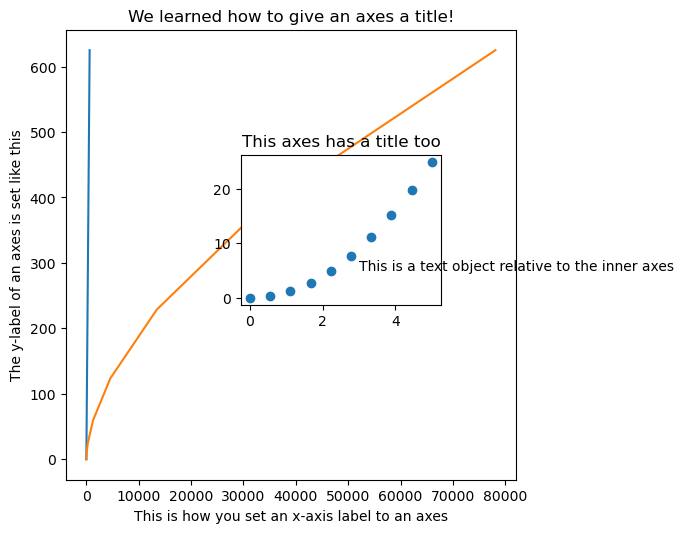

In [3]:
### Create a figure ###
example_figure = plt.figure(figsize =(5,5)) #you give the size of the figure as a tuple of inches

### Create an axes separately and add it to the figure ###
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #the argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top.

### Set labels and titles to the axes ###
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.scatter(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis.
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text.
#For more information there are many good tutorials available for example in youtube.

###  Subplots: creating multiple axes and placing them in a grid on the figure
An established convention of using matplotlib is to start plotting by calling the **<font color = blue> plt.subplots </font>** function, which automatically creates a figure and a determined number of axes in a grid inside it and automatically links the axes to the figure. Even when creating just one axes this is a often used way to start making a plot.

The most important arguments to **<font color = blue> plt.subplots </font>** are **nrows**, **ncols**, **figsize**, **sharex** and **sharey**
- **nrows** controls how many subplots there will be in the grid by row, **ncol** controls the number of columns
- **figsize** is a tuple e.g (1,5) which controls the size of the **<font color = dimgrey> figure </font>**, first is width and then height.
- sharex (True, False) tells matplotlib whether all axes in the grid should have same x-axis scale and ticks, sharey does the same for all y.

--------
Below an example on creating subplots is presented. There is also a template-like example on how to fill the subplots in a loop using the  **enumerate** function of python for indexing into the subplots. The function **enumerate()** will give you an additional int indexer over the object you are looping over. This indexer can be used to loop over the different subplot elements like the axes for each of the subplots.

**<font color = dimgrey> plt.tight_layout() </font>** is also a good command to know with subplots. It attempts to automatically arrange the different axes in a pretty way. It should be called after the plot is finished.

In [4]:
# ----- Create some random data for the example, 3 continuous numeric features and 3 binary -----
#dont worry about understanding the function, it creates lists and is shorthand for a for loop called list comprehension.
numeric_datas = [np.random.rand(10,2) for _ in range(0,3)] #this creates list of lists of linear data, using list comprehension
binary_datas = [(np.unique(np.random.randint(0, 2, size= 10), return_counts = True)[1]) for _ in range(0,3)] # create list of lists of samples of 0,1 like (co

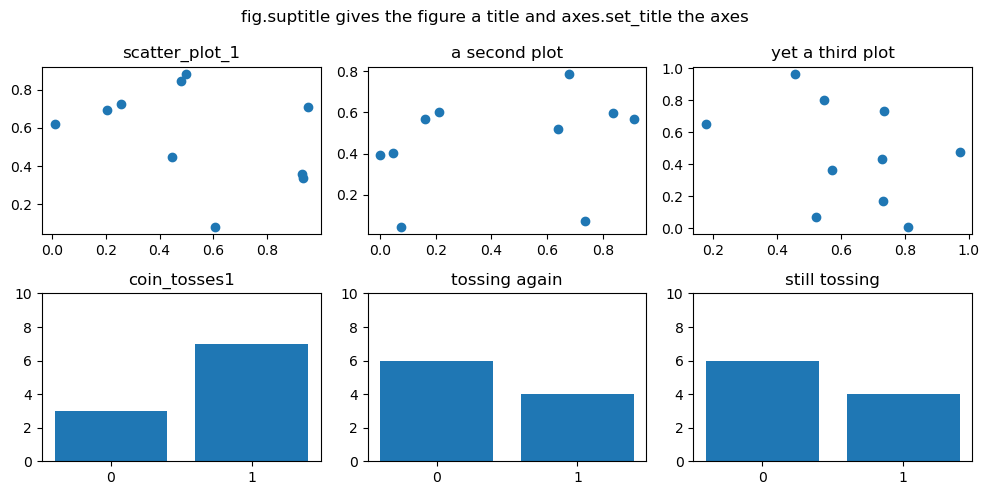

In [5]:
# Create figure with six axes in a 2*3 grid and set up titles --------------------------------------------------------
fig, axes = plt.subplots(2,3, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['scatter_plot_1', 'a second plot', 'yet a third plot' ]#some titles for the different axes
binary_plot_titles = ['coin_tosses1', 'tossing again', 'still tossing' ]#some titles for the different axes


# Enumerate the index into the axes, fill the first 3 columns of first row with scatterplots of numeric_datas --------
i = 0 # for indexing to the row of the axes [**i**, j]
for j, numeric_data in enumerate(numeric_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].scatter(x = numeric_data[:, 0], y = numeric_data[:, 1]) #plots are called on the axes
    axes[i, j].set_title(numeric_plot_titles[j]) #set a title for each axes
plt.tight_layout()


# Plot the binary data -----------------------------------------------------------------------------------------------
i = 1 # second row
for j, binary_data in enumerate(binary_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].bar(x = ["0","1"], height = binary_data) #make a barplot
    axes[i, j].set_title(binary_plot_titles[j]) #set a title for each axes
    axes[i, j].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()

####  <font color = maroon> Seaborn and matplotlib </font>
- Finally, it is good to know, that the popular Seaborn plotting library is based on matplotlib, and was designed to be an extension of it and to be more user-friendly and faster to use.  

- One tip in particular that might help new users with seaborn is that two kinnds of plotting functions: for figure-level and axes-level plots. Axes level plots can be put into subplots like matplotlib plots as you saw in the example above whereas figure-level plots are done completely with seaborn. (For more information on this see https://seaborn.pydata.org/tutorial/function_overview.html)

- For axes-level plots, the matplotlib-axes object is usually given to the seaborn plotting function as an argument. There is an example below.

<Axes: ylabel='Count'>

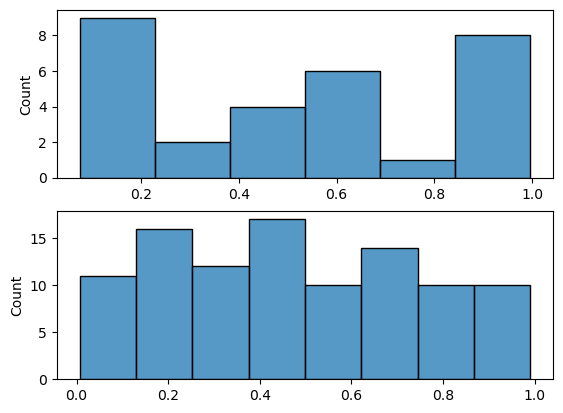

In [6]:
fig, axes = plt.subplots(2)

# make some data
random_data_a = np.random.rand(30)
random_data_b = np.random.rand(100)

# print the data we are plotting
sns.histplot(data = random_data_a, ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data =  random_data_b, ax = axes[1]) # we make a seaborn plot and put it into one of the axes we created


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The dataset in this exercice contains comprehensive health information from  hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart.

 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources:
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days
| gender | binary | Male/Female
| body_mass | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| blood_pressure_high | numeric | Measured Systolic blood pressure
| blood_pressure_low | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| serum_lipid_level | categorical | Serum lipid / Cholesterol associated risk information evaluated by a doctor
|family_history| binary | Indicator for the presence of family history of cardiovascular disease based on medical records of patients
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data***

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-made code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [7]:
 # --- READ IN DATA (no need to change) --------
data_path = r"C:\Users\Comp-servis\Desktop\Data Analyisis and Knowledge Discovery\Exercise 1\CardioCare_ex1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'body_mass':'int', 'blood_pressure_low':'int', 'blood_pressure_high':'int', 'gender': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'serum_lipid_level':'category', 'family_history':'boolean'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run.

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_When working with DataFrames, it can be incredibly helpful to organize column names into a list or lists. This organization simplifies data manipulation and analysis, and can be used to easily select, filter, or perform operations on specific sets of columns, it also prevents typing errors and avoids repetition!_

_For example, you can access all columns in you DataFrame with numeric features using the data[numeric_features] notation_


In [9]:
# --- Your code here for 1 a) ---

#Printing out the first five rows of the data
print(data.head(5))

#Saving the feature names to lists by their types
numeric_features = ['age','body_mass','height','blood_pressure_high','blood_pressure_low']
binary_features = ['gender','smoke','active','family_history','cardio']
categorical_features = ['serum_lipid_level']

     age  gender  height  body_mass  blood_pressure_high  blood_pressure_low  \
0  19797   False     161         55                  102                  68   
1  22571    True     178         68                  120                  70   
2  16621    True     169         69                  120                  80   
3  16688   False     156         77                  120                  80   
4  19498    True     170         98                  130                  80   

   smoke  active  cardio serum_lipid_level  family_history  
0  False    True   False          elevated           False  
1  False   False   False            normal           False  
2  False    True   False            normal           False  
3  False    True   False            normal           False  
4   True    True    True          elevated           False  


_________
## <font color = dimgrey> 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It might be tempting to just use the data as is with a model, but it is very important to first check the data for possible mistakes as they can make all the conclusions you make based on your analysis misleading. One good routine for checking data quality is to first calculate statistical descriptives and then to plot the features to check if the values are realistic.

  
-----------    
    
Some descriptive statistics don't really make sense for certain kinds of features. In pandas, like in many other packages, some functions work differently depending on the data type of a column. In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different.

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [10]:
# --- 2 a) Print the feature types of your dataset --- #
print(data.dtypes)

age                       int32
gender                  boolean
height                    int32
body_mass                 int32
blood_pressure_high       int32
blood_pressure_low        int32
smoke                   boolean
active                  boolean
cardio                  boolean
serum_lipid_level      category
family_history          boolean
dtype: object


--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [11]:
# --- Your code for 2 b) --- #
print(data.describe())

                age      height   body_mass  blood_pressure_high  \
count    210.000000  210.000000  210.000000           210.000000   
mean   19455.504762  164.180952   73.895238           127.857143   
std     2429.010199    7.534648   14.612326            17.508947   
min    14367.000000  142.000000   45.000000            90.000000   
25%    17635.750000  158.000000   64.000000           120.000000   
50%    19778.000000  164.000000   70.000000           120.000000   
75%    21230.500000  170.000000   81.000000           140.000000   
max    23565.000000  195.000000  125.000000           190.000000   

       blood_pressure_low  
count          210.000000  
mean            81.814286  
std              9.947652  
min             50.000000  
25%             80.000000  
50%             80.000000  
75%             90.000000  
max            120.000000  


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened?


<font color="green">Your answer for 2 c)</font>
I could not get statistics for all of the features. It seems that describe() method only returns description of the NUMERICAL data. 

----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [12]:
# 2 d) Your code here #
nonnumeric_features=binary_features+categorical_features
for i in nonnumeric_features:
    print(data[i].describe(include = 'object'))

count       210
unique        2
top       False
freq        129
Name: gender, dtype: object
count       210
unique        2
top       False
freq        186
Name: smoke, dtype: object
count      210
unique       2
top       True
freq       162
Name: active, dtype: object
count       210
unique        2
top       False
freq        128
Name: family_history, dtype: object
count       210
unique        2
top       False
freq        105
Name: cardio, dtype: object
count        210
unique         4
top       normal
freq         153
Name: serum_lipid_level, dtype: object


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv.

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives.

In [13]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()


,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,family_history
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000,0.390476
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195,0.489023
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000,0.000000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000,1.000000


***2 e)*** Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types?

<font color="green">Your answer for 2 e)</font>

In the table above, it can be seen that the mean, std and other statistical parameters are calculated for categorical or binary data, which is not meaningful measures for the mentioned data types. This method assumed that data in the binary and categorical variables is numerical and provided the summary statistics based on this false assumption.
It is really important to define the data types correctly to get the appropriate summary statistics for each type of data.

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


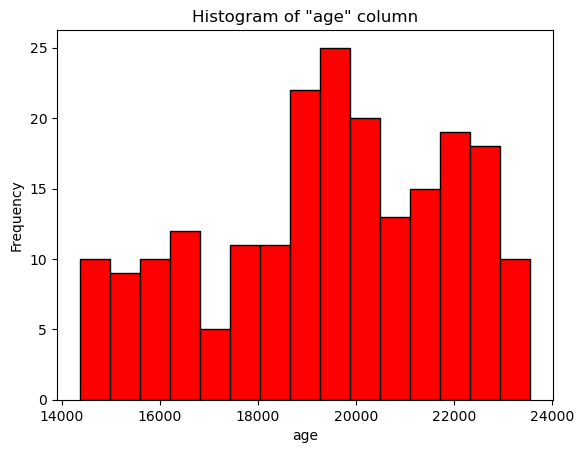

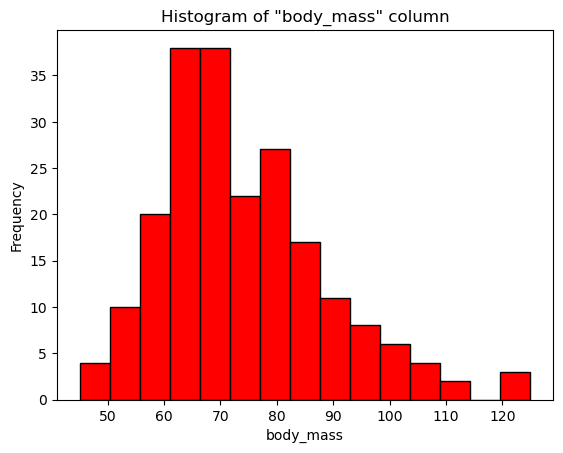

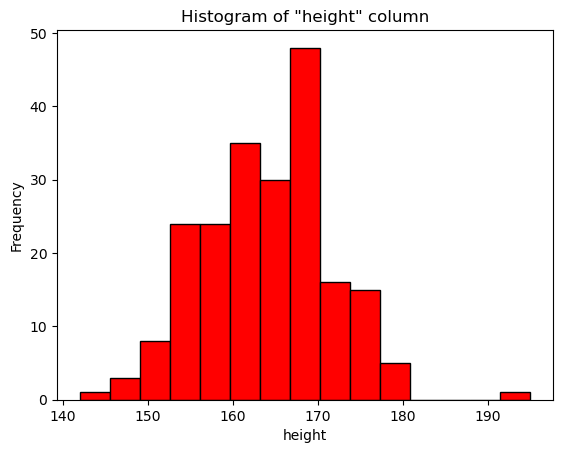

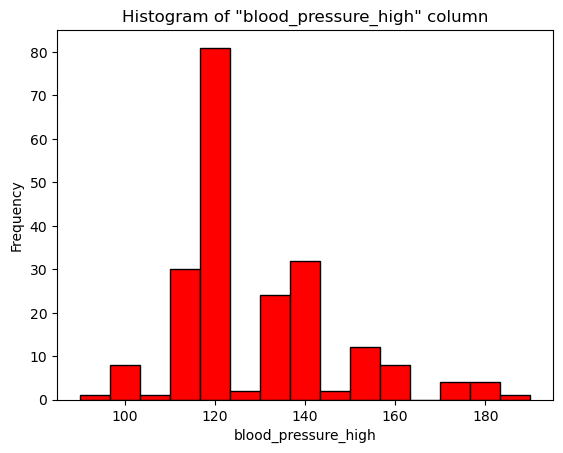

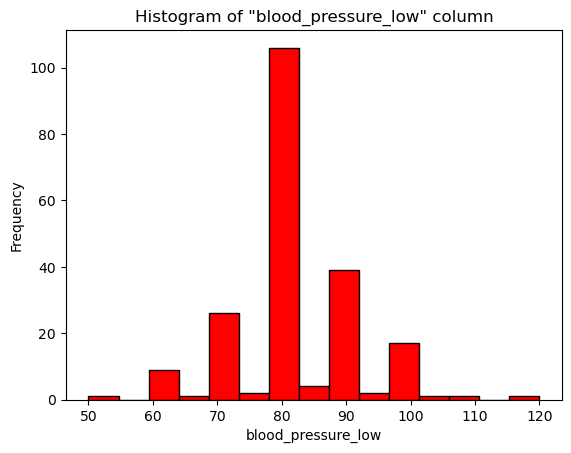

In [14]:
# --- Your code for 3 a) here --- #
#Creating a dataset only with numerical data
numeric_data=data[numeric_features]

#Plotting the histograms for each column in newly created dataset with numerical data
for column in numeric_data.columns:
    plt.hist(numeric_data[column], bins=15, color='red', edgecolor='black')
    
    # Setting the name for x axis
    plt.xlabel(column)
    
    # Setting the name for y axis
    plt.ylabel('Frequency')
    
    # Setting the title of the graph
    plt.title(f'Histogram of "{column}" column')
    
    # Displaying the plot
    plt.show()

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._

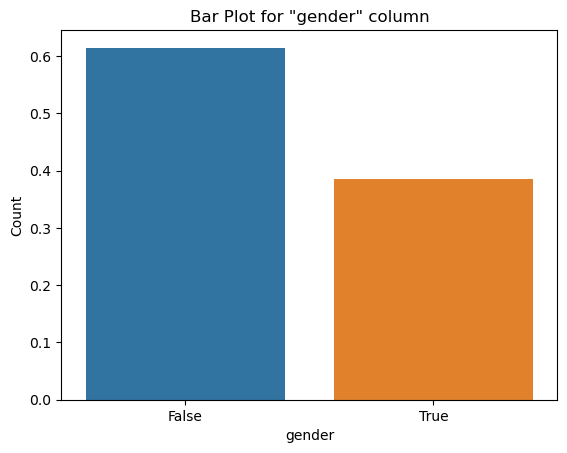

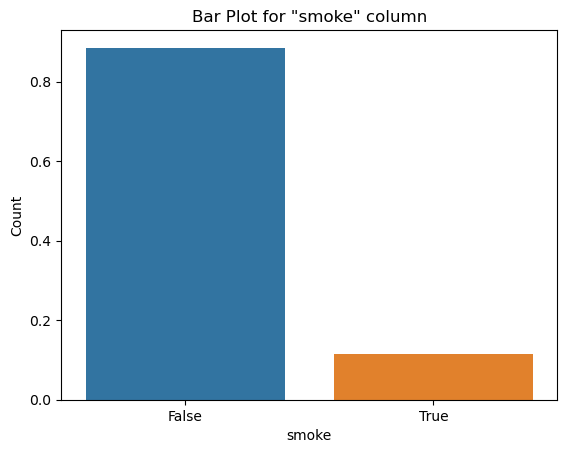

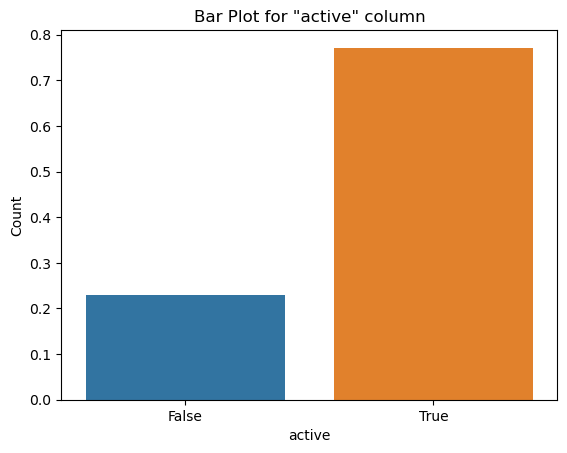

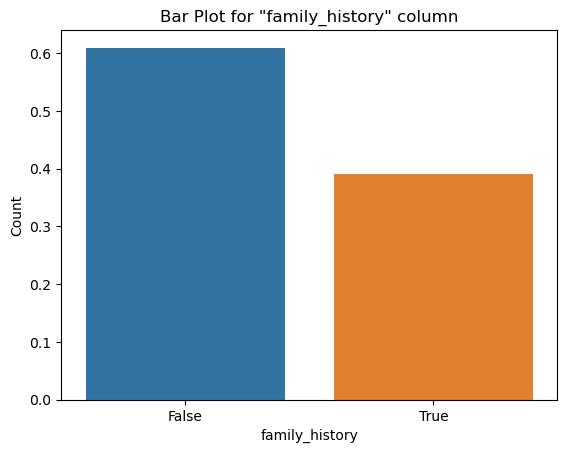

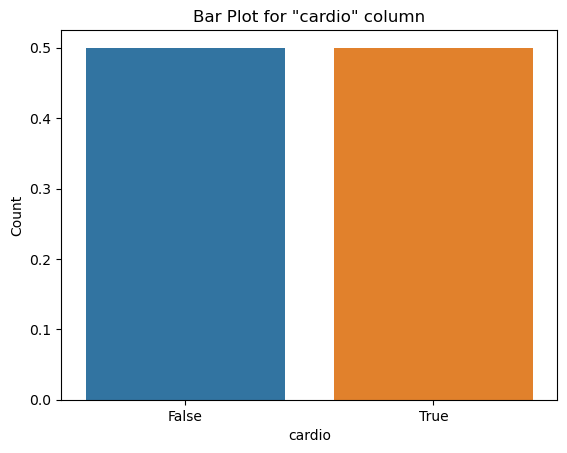

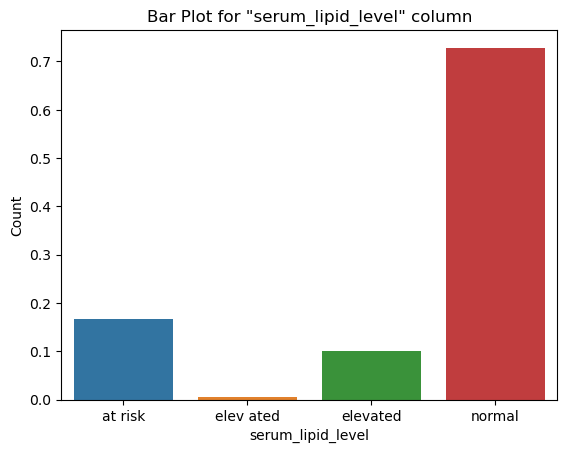

In [15]:
### Your code for 4 a) here ###

# Creating a dataset only with non-numerical data (categorical + binary data)
nonnumeric_data=data[nonnumeric_features]

for column in nonnumeric_data.columns:
        # Calculating normalized counts
        counts = nonnumeric_data[column].value_counts(normalize=True)
        
        # Plotting bar plot with Seaborn
        sns.barplot(x=counts.index, y=counts.values)
        
        # Setting the name for x axis
        plt.xlabel(column)
        
        # Setting the name for y axis
        plt.ylabel('Count')
        
        # Setting the title for the barplots
        plt.title(f'Bar Plot for "{column}" column')
        
        # Displaying the plot
        plt.show()

**4 b)** Do you see something odd with one of the features? Fix it.

If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

<font color="green">Your answer for 4 b)</font>

In [16]:
### Your code for 4 b) here ###

# Serum_lipid_level column includes a strange category 'elev ated'. The category can either be renamed to the 'elevated' or removed
# since the above text is about removing the categories, it is decided to remove the category.

data['serum_lipid_level'] = data['serum_lipid_level'].cat.remove_categories("elev ated")

-------------

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.

--------------

**BMI**, or **Body Mass Index**, is a simple numerical measure that is commonly used to assess an individual's body weight in relation to their height. In our use case, BMI can be a useful indicator in the prediction of cardiovascular problems, as it could provide a well-established link between obesity and an increased risk of developing the disease.

\begin{align*}
\text{BMI} & = \frac{\text{Body mass (kg)}}{(\text{height (m)})^2} \\
\end{align*}

---------------------------------------
***5 a)*** Generate a new feature based off of the provided formula, using 'height' and 'body_mass' and name it **BMI**

_tip: In the case of our dataset the height is in centimeters, so make sure to convert it into meters_

In [17]:
### Your code for 5 a) here ###
data['BMI']= data['body_mass']/((data['height']/100)**2)
print(data)

       age  gender  height  body_mass  blood_pressure_high  \
0    19797   False     161         55                  102   
1    22571    True     178         68                  120   
2    16621    True     169         69                  120   
3    16688   False     156         77                  120   
4    19498    True     170         98                  130   
..     ...     ...     ...        ...                  ...   
205  16630   False     158         55                  120   
206  16742   False     170         68                  110   
207  23117   False     157         78                  100   
208  15236   False     153         55                  120   
209  18043    True     172         78                  140   

     blood_pressure_low  smoke  active  cardio serum_lipid_level  \
0                    68  False    True   False          elevated   
1                    70  False   False   False            normal   
2                    80  False    True   False     

***5 b)*** Using the previously calculated feature **BMI** generate a new feature named **BMI_category** that categorizes the values into groups, according to the standard BMI categories :

- Underweight: BMI less than 18.5
- Normal Weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or greater

In [18]:
### Your code for 5 b) here ###

# Identifying the bin edges for categorizing BMI values into weight categories.
bins = [float('-inf'), 18.5, 24.9, 29.9, float('inf')]

# Setting the labels for the weight categories
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# Creating a new categorical column based on conditions in 'BMI' column
data['BMI_category'] = pd.cut(data['BMI'], bins=bins, labels=labels)

# Displaying the updated DataFrame
data

,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,serum_lipid_level,family_history,BMI,BMI_category
0,19797,False,161,55,102,68,False,True,False,elevated,False,21.218317,Normal Weight
1,22571,True,178,68,120,70,False,False,False,normal,False,21.461937,Normal Weight
2,16621,True,169,69,120,80,False,True,False,normal,False,24.158818,Normal Weight
3,16688,False,156,77,120,80,False,True,False,normal,False,31.640368,Obese
4,19498,True,170,98,130,80,True,True,True,elevated,False,33.910035,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,16630,False,158,55,120,80,True,True,False,normal,False,22.031726,Normal Weight
206,16742,False,170,68,110,70,False,True,False,normal,False,23.529412,Normal Weight
207,23117,False,157,78,100,60,False,True,True,normal,False,31.644286,Obese
208,15236,False,153,55,120,80,False,True,False,normal,False,23.495237,Normal Weight


Now that we have our BMI values, it's a good practice to see if we can spot a hidden trend in our data.

***5 c)*** Create a countplot to visualize the distribution of cardio (target variable)  within different BMI categories.

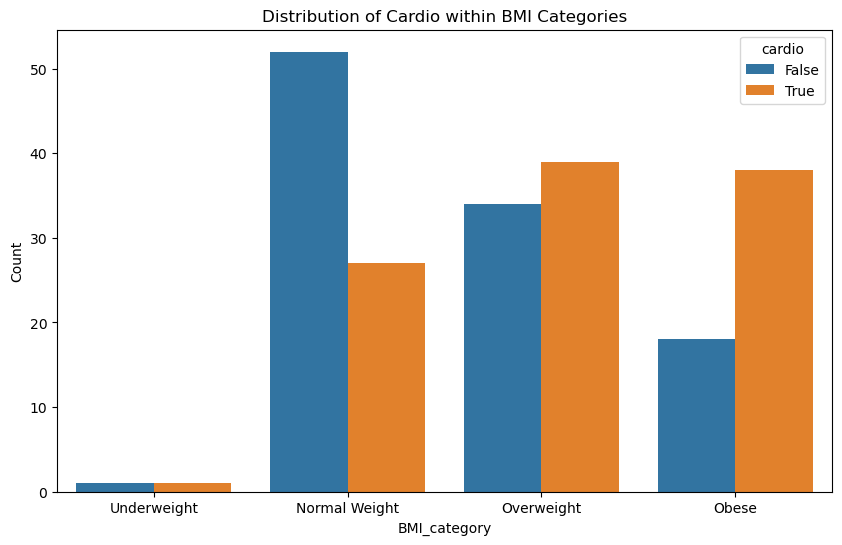

In [19]:
### Your code for 5 c) here ###

# Creating a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_category', hue='cardio', data=data)

# Adding labels
plt.xlabel('BMI_category')
plt.ylabel('Count')

# Adding Title
plt.title('Distribution of Cardio within BMI Categories')

# Displaying the plot
plt.show()

***5 d)*** Can you notice any relationship or visible trend?

<font color="green">Your answer for 5 d)</font>
Yes, it can be seen that there is a clear relationship between the cases of cardiac disease and BMI categories. The division of 'True' to 'False' of cardio cases in each category reveals that the probability of having cardiac disease increases with having higher Body Mass Index score.

Below, there is ready-made code for you to appropriatly add the newly created features to the right column type list. You don't need to change anything about the code, just make sure that the names of the added features are as specified earlier (**BMI** and **BMI_category**)

In [20]:
# ---- Add features to column type list (no need to change) --------
numeric_features.append("BMI")
data['BMI_category'] = data['BMI_category'].astype('category')
categorical_features.append("BMI_category")

-------------

## 6. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations.

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both.

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [21]:
# --- Your code for 6 a) here --- #
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numeric columns for scaling
numeric_columns = ['age','body_mass','height','blood_pressure_high','blood_pressure_low','BMI']
data_numeric = data[numeric_columns]

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fiting and transforming the numeric data
scaled_data = scaler.fit_transform(data_numeric)

# Creating a data_min_maxed dataframe with the scaled data
data_min_maxed = pd.DataFrame(scaled_data, columns=numeric_columns)

data_min_maxed.head()

,age,body_mass,height,blood_pressure_high,blood_pressure_low,BMI
0,0.590346,0.1250,0.358491,0.12,0.257143,0.094180
1,0.891933,0.2875,0.679245,0.30,0.285714,0.101828
2,0.245053,0.3000,0.509434,0.30,0.428571,0.186493
3,0.252337,0.4000,0.264151,0.30,0.428571,0.421364
4,0.557839,0.6625,0.528302,0.40,0.428571,0.492617


**6 b)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [22]:
# Your code for 6 b here --- #

# Selecting only the numeric columns for scaling
numeric_columns = ['age','body_mass','height','blood_pressure_high','blood_pressure_low','BMI']
data_numeric = data[numeric_columns]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fiting and transforming the numeric data
standardized_data = scaler.fit_transform(data_numeric)

# Creating a data_standardized dataframe with the scaled data
data_standardized = pd.DataFrame(standardized_data, columns=numeric_columns)

**6 c)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help.

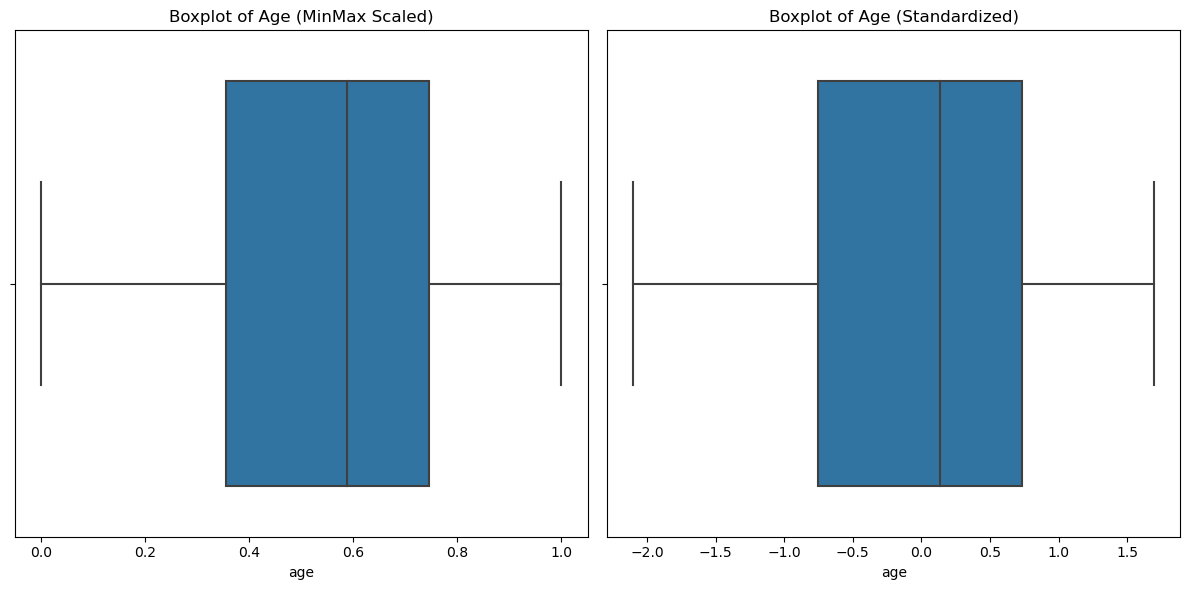

In [23]:
# Your code for 6 c) here --- #

# Seting up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Creating a Boxplot for data_min_maxed
sns.boxplot(x='age', data=data_min_maxed, ax=axes[0])

# Setting the title
axes[0].set_title('Boxplot of Age (MinMax Scaled)')

# Creating a Boxplot for data_standardized
sns.boxplot(x='age', data=data_standardized, ax=axes[1])

# Setting the title
axes[1].set_title('Boxplot of Age (Standardized)')

# Putting the plots side-by-side
plt.tight_layout()

# Displaying the plots
plt.show()

**6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?


_tip: Consider factors like the location of the mean, and the range of values presented._

<font color="green">Your answer for 6 d)</font>

I would expect to see the range of the data be from 0 to 1.0 in the min-max scaled boxplot, since the min-max scaling transforms the data to the range of 0 to 1. The data seems to be centered around 0.5, which I would expect to see.
When it comes to the standardized data, there is no specific expected range, since the range can theoretically extend from positive infinity to positive infinity. The data is also centered around 0, which is very typical of this method.

The box-plots for min-max scaled and standardized data have different characteristics. For instance, the data is centered around 0 in the standardized data, however min-max scaled data is not specifically centered. The range is typically from 0 to 1 in the min-max scaled data, while the standardized data does not have a particular range.

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it.

--------------------

***6e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [24]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [25]:
# --- Your code for 6 e) ---

# Defining a variable that contains the min-maxed values of the age_w_outlier variable
age_w_outlier_minmaxed = minmax_scale(age_w_outlier)

#create a variable that contains the standardized values of the age_w_outlier variable
age_w_outlier_standardized = scale(age_w_outlier)


***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

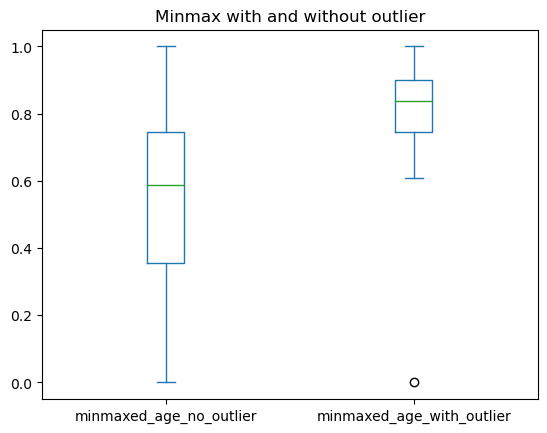

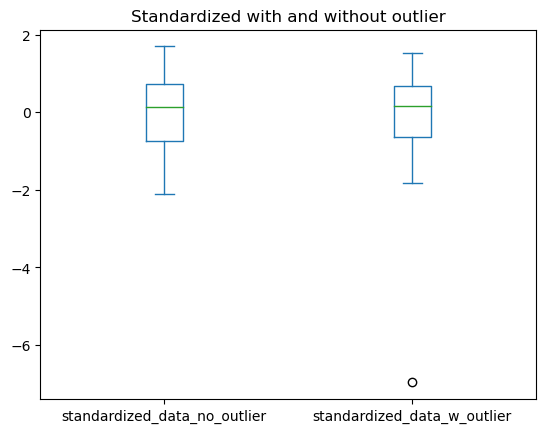

In [26]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age,
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age,
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**6 f) Look at the output of the above cell and answer the following**:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?


<font color="green">Your answer for 6 f)</font>
1. The main difference between these cases is that there are more significant changes to the box-plot diagram for the min-max data than the standardized data. The outlier had more effect on the box-plot for min-maxed data than that of standardized data.
2. It is evident that the standardization is less affected by outliers than Min-Max scaling. Min-Max scaling is very sensitive to the outliers. 

---------------
## 7. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other.

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'serum_lipid_level' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


***7 a)*** One-hot-encode the serum_lipid_level-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe.

_tip: pandas has a function for this, google!_

In [27]:
# --- Your code for 7 a) here ---

# One-hot encoding 'serum_lipid_level' and adding new features
data = pd.get_dummies(data, columns=['serum_lipid_level'], prefix='lipid')

# Displaying the first rows of the updated DataFrame
print(data.head())

     age  gender  height  body_mass  blood_pressure_high  blood_pressure_low  \
0  19797   False     161         55                  102                  68   
1  22571    True     178         68                  120                  70   
2  16621    True     169         69                  120                  80   
3  16688   False     156         77                  120                  80   
4  19498    True     170         98                  130                  80   

   smoke  active  cardio  family_history        BMI   BMI_category  \
0  False    True   False           False  21.218317  Normal Weight   
1  False   False   False           False  21.461937  Normal Weight   
2  False    True   False           False  24.158818  Normal Weight   
3  False    True   False           False  31.640368          Obese   
4   True    True    True           False  33.910035          Obese   

   lipid_at risk  lipid_elevated  lipid_normal  
0              0               1             0  


----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

- Below are the bonus exercises. You can stop here, and get the "pass" grade.
- By doing the bonus exercises below, you can get a "pass with honors", which means you will get one point bonus for the exam.

The following exercises are more challenging and not as straight-forward and may require some research of your own. However, perfect written answers are not required, but answers that show that you have tried to understand the problems and explain them with your own words.

____________
##  <font color = dollargreen > 8. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

-------------
**8 a)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**.

In [27]:
# --- Your for 8 a) code here --- #

-------------


**8 b) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation (see tutorial). The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

In [28]:
# --- Your code for 8 b) --- you can make more cells if you like ---



**8 c) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features

In [29]:
# --- Your code for 8 c) here --- #

----------
**8 d) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:**

1. Where do you think the difference between the amounts of explained variance might come from?

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

<font color="green">Your answer for 8 d)</font>

------------------

## <font color = dollargreen > 9. Bonus: t-SNE and high dimensional data </font>

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***9 a)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [30]:
# --- Your code for 9 a) here --- #

***9 b)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

In [31]:
# --- Code for 9 b) --- #

***9 c)***

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_

<font color="green">Your answer for 9 c)</font>